In [4]:
import numpy as np
import matplotlib.pyplot as plt

import Corrfunc 

In [5]:
box_size = 1000
n_points = 50000
volume = box_size**3

density = n_points / volume

print(f"Density: {density:.6f} particles per (Mpc/h)^3")

Density: 0.000050 particles per (Mpc/h)^3


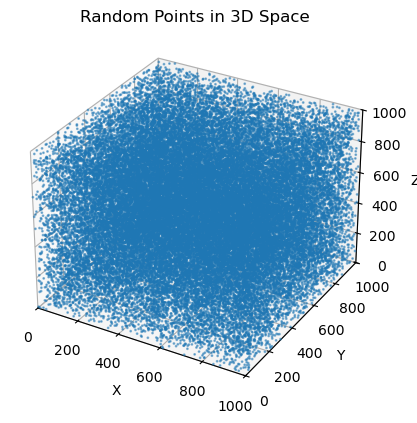

In [6]:
X, Y, Z = np.random.rand(3, n_points) * box_size

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, alpha=0.5, s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)
ax.set_zlim(0, box_size)
ax.set_title('Random Points in 3D Space')
plt.show()

In [7]:
# compute RR points
r_min = 0
r_max = 20
n_bins = 20
 
bin_edges = np.linspace(r_min, r_max, n_bins+1)

In [8]:
RR = Corrfunc.theory.DD(
    autocorr=True,
    nthreads=4,
    binfile=bin_edges,
    boxsize=box_size,
    X1=X,
    Y1=Y,
    Z1=Z,
    periodic=True,
)

RR

array([( 0.,  1., 0., 50014, 0.), ( 1.,  2., 0.,    92, 0.),
       ( 2.,  3., 0.,   196, 0.), ( 3.,  4., 0.,   412, 0.),
       ( 4.,  5., 0.,   618, 0.), ( 5.,  6., 0.,   994, 0.),
       ( 6.,  7., 0.,  1386, 0.), ( 7.,  8., 0.,  1780, 0.),
       ( 8.,  9., 0.,  2310, 0.), ( 9., 10., 0.,  2822, 0.),
       (10., 11., 0.,  3592, 0.), (11., 12., 0.,  4084, 0.),
       (12., 13., 0.,  4876, 0.), (13., 14., 0.,  5782, 0.),
       (14., 15., 0.,  6484, 0.), (15., 16., 0.,  7506, 0.),
       (16., 17., 0.,  8540, 0.), (17., 18., 0.,  9940, 0.),
       (18., 19., 0., 10580, 0.), (19., 20., 0., 12104, 0.)],
      dtype=[('rmin', '<f8'), ('rmax', '<f8'), ('ravg', '<f8'), ('npairs', '<u8'), ('weightavg', '<f8')])

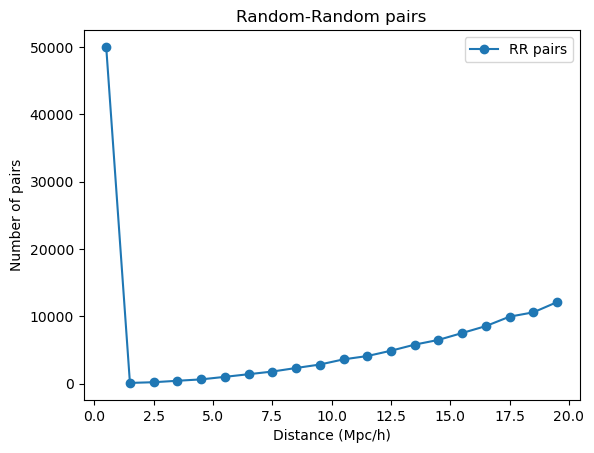

In [9]:
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.plot(bin_centers, RR['npairs'], marker='o', label='RR pairs')

plt.xlabel('Distance (Mpc/h)')
plt.ylabel('Number of pairs')
plt.title('Random-Random pairs')
plt.legend()
plt.show()

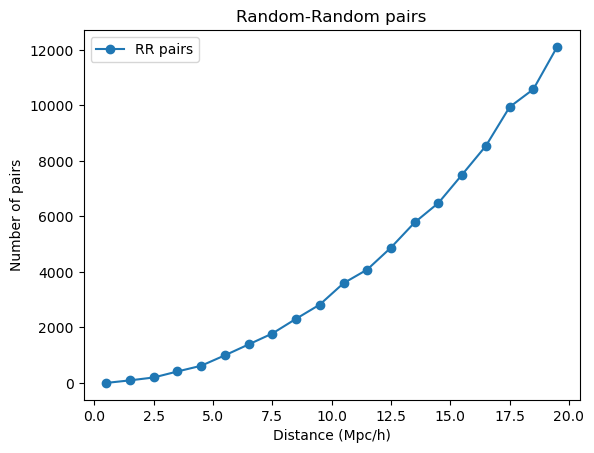

In [12]:
#il primo bin è il numero di oggetti+numero di coppie nel bin
# è quindi il segnale di correlazione

RR['npairs'][0] = 0

plt.plot(bin_centers, RR['npairs'], marker='o', label='RR pairs')
plt.xlabel('Distance (Mpc/h)')
plt.ylabel('Number of pairs')
plt.title('Random-Random pairs')
plt.legend()
plt.show()

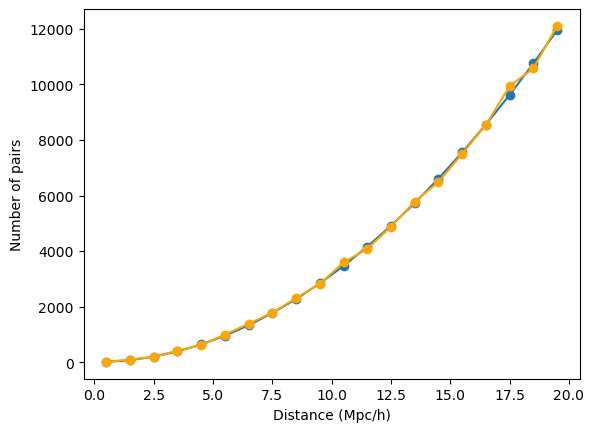

In [11]:
pairs_per_object = density * 4/3 * np.pi * (bin_edges[1:]**3 - bin_edges[:-1]**3)

plt.plot(bin_centers, pairs_per_object*n_points, marker='o', label='pairs per object')
plt.plot(bin_centers, RR['npairs'], marker='o', label='RR pairs', color='orange')
plt.xlabel('Distance (Mpc/h)')
plt.ylabel('Number of pairs')
plt.show()